Promo Data Analysis Exam - Archemedez Luayon

In [84]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# Loading the data

data = pd.read_csv(r"C:\Users\Archmdz\Desktop\promo_order_data.csv")
data.head()


,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


In [3]:
print(data.describe()) 
print("\nData Lenght:", len(data))

        trans_hour    customers      vendors        orders        amount  \
count  2485.000000  2485.000000  2485.000000   2485.000000   2485.000000   
mean     12.748893  1368.490946   388.434608   1391.750503  10501.810254   
std       4.803603  2004.241830   408.808706   2035.524228  13429.995228   
min       0.000000     2.000000     2.000000      2.000000      0.000000   
25%       9.000000    28.000000    20.000000     28.000000    625.800000   
50%      13.000000   474.000000   254.000000    482.000000   4485.200000   
75%      17.000000  1892.000000   624.000000   1924.000000  14793.460000   
max      23.000000  9910.000000  1482.000000  10046.000000  63756.420000   

       promo_count  promo_amount      Android          GCF    Macintosh  \
count  2485.000000           0.0  2455.000000  2455.000000  2455.000000   
mean     28.863581           NaN    76.957230    24.561303     1.492464   
std      52.014765           NaN   108.116562    27.477949     2.556263   
min       0.000

Data Cleaning

In [7]:
# Checking for missing values

print("Missing Values:")
data.isnull().sum()

Missing Values:


trans_date          object
trans_hour           int64
customers          float64
vendors            float64
orders             float64
amount             float64
promo_count        float64
promo_amount       float64
Android            float64
GCF                float64
Macintosh          float64
Tablet             float64
Windows            float64
X11                float64
iPhone             float64
Blacklisted        float64
Not Blacklisted    float64
dtype: object

In [8]:
# Checking if there are NoneTypes
data.dtypes

trans_date          object
trans_hour           int64
customers          float64
vendors            float64
orders             float64
amount             float64
promo_count        float64
promo_amount       float64
Android            float64
GCF                float64
Macintosh          float64
Tablet             float64
Windows            float64
X11                float64
iPhone             float64
Blacklisted        float64
Not Blacklisted    float64
dtype: object

In [5]:
# Instead of dropping NaN/null values, I decided to fill them up since these values are supposed to be zeroes
data = data.fillna(0)
data.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,0.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,0.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,0.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,0.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


Showing how promos affect business in different metrics:

A. Number of unique customers vs. number of promos used

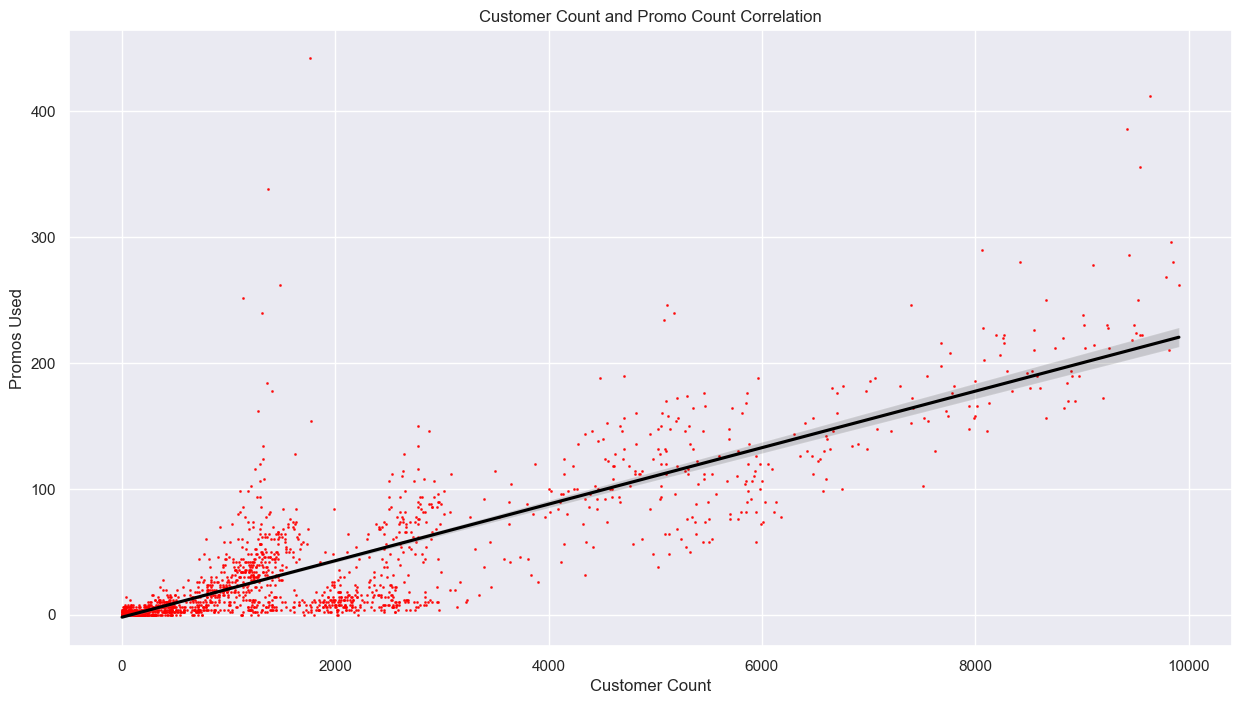

In [249]:
# Setting up plot aesthetics
sns.set_theme(style='whitegrid', palette='pastel')
sns.set_theme(style = 'whitegrid', palette = 'dark')
sns.set(font_scale = 1)
rcParams['figure.figsize'] = 15, 8

# Plotting data
sns.regplot(data = data, x = data['customers'], y = data['promo_count'], marker = 'o', color = 'red', scatter_kws = {'s':1}, line_kws = {'color':'black'})
plt.title('Customer Count and Promo Count Correlation')
plt.xlabel('Customer Count')
plt.ylabel('Promos Used')
plt.grid(visible=True)
plt.show()

B. Numer of unique vendors active vs. number of promos used

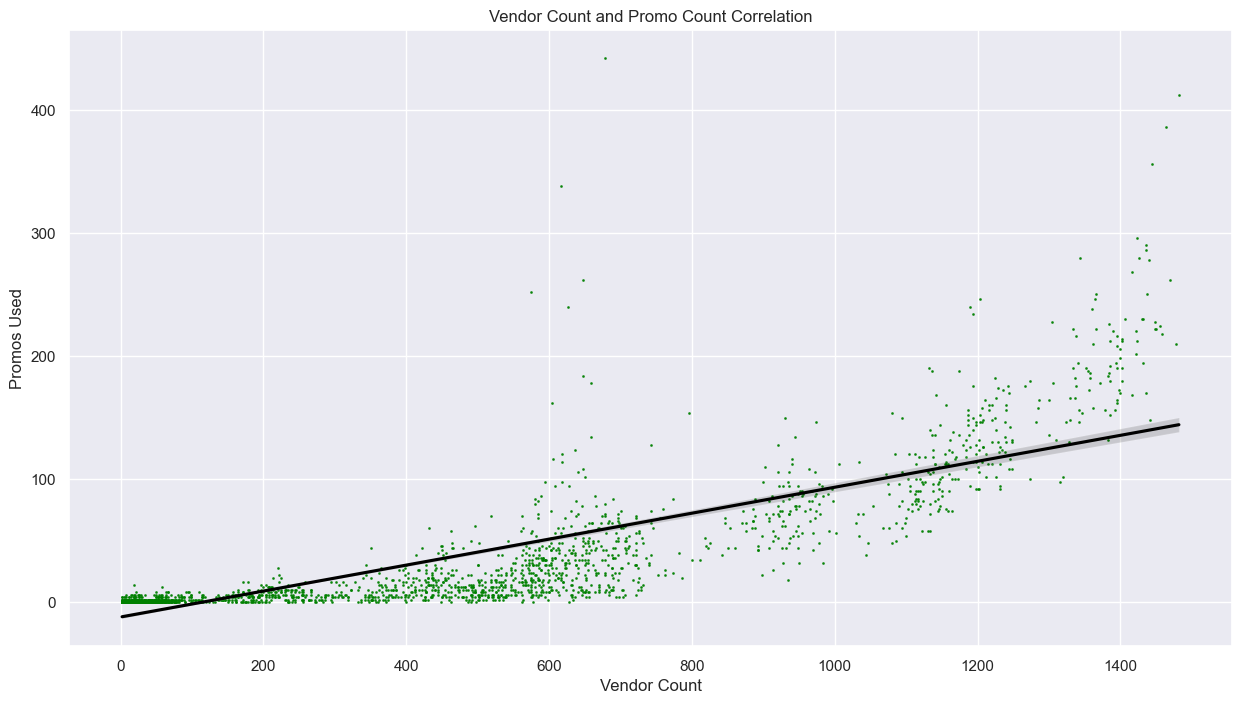

In [250]:
# Setting up plot aesthetics
sns.set_theme(style = 'whitegrid', palette = 'dark')
sns.set(font_scale = 1)
rcParams['figure.figsize'] = 15, 8

sns.regplot(data = data, x = data['vendors'], y = data['promo_count'], marker = 'o', color = 'green', scatter_kws = {'s':1}, line_kws = {'color':'black'})
plt.title('Vendor Count and Promo Count Correlation')
plt.xlabel('Vendor Count')
plt.ylabel('Promos Used')
plt.grid(visible = True)
plt.show()

C. Number of Orders vs. number of promos used

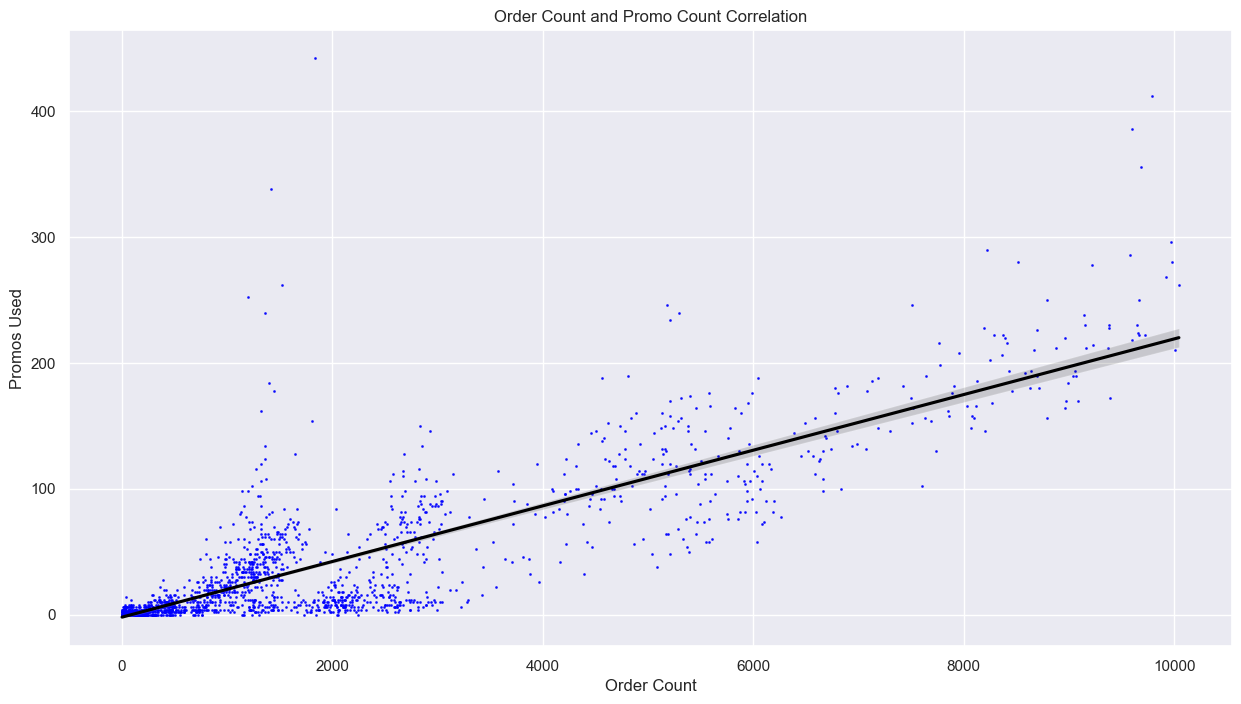

In [251]:
# Setting up plot aesthetics
sns.set_theme(style = 'whitegrid', palette = 'dark')
sns.set(font_scale = 1)
rcParams['figure.figsize'] = 15, 8

sns.regplot(data = data, x = data['orders'], y = data['promo_count'], marker = 'o', color = 'blue', scatter_kws = {'s':1}, line_kws = {'color':'black'})
plt.title('Order Count and Promo Count Correlation')
plt.xlabel('Order Count')
plt.ylabel('Promos Used')
plt.grid(visible = True)
plt.show()

E. Amount of orders vs. number of promos used

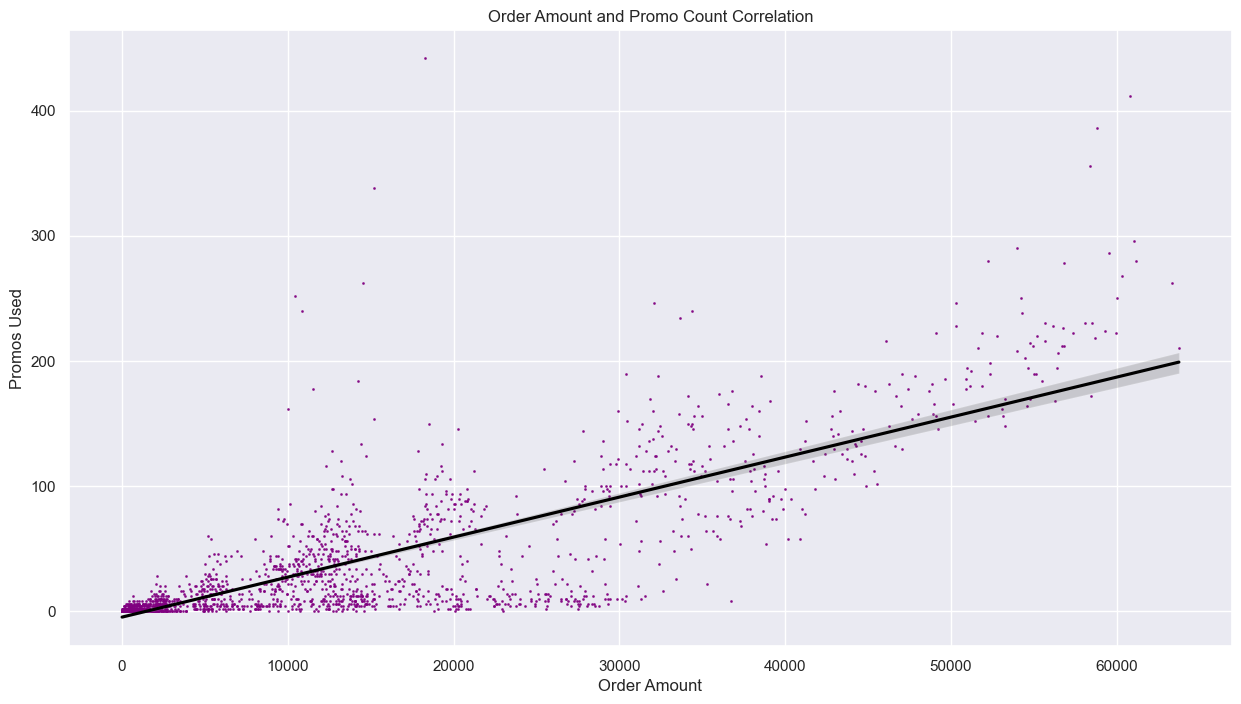

In [252]:
# Setting up plot aesthetics
sns.set_theme(style = 'whitegrid', palette = 'dark')
sns.set(font_scale = 1)
rcParams['figure.figsize'] = 15, 8

sns.regplot(data = data, x = data['amount'], y = data['promo_count'], marker = 'o', color = 'purple', scatter_kws = {'s':1}, line_kws = {'color':'black'})
plt.title('Order Amount and Promo Count Correlation')
plt.xlabel('Order Amount')
plt.ylabel('Promos Used')
plt.grid(visible = True)
plt.show()

Peak Customer Hours and Promo usage

In [173]:
data.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


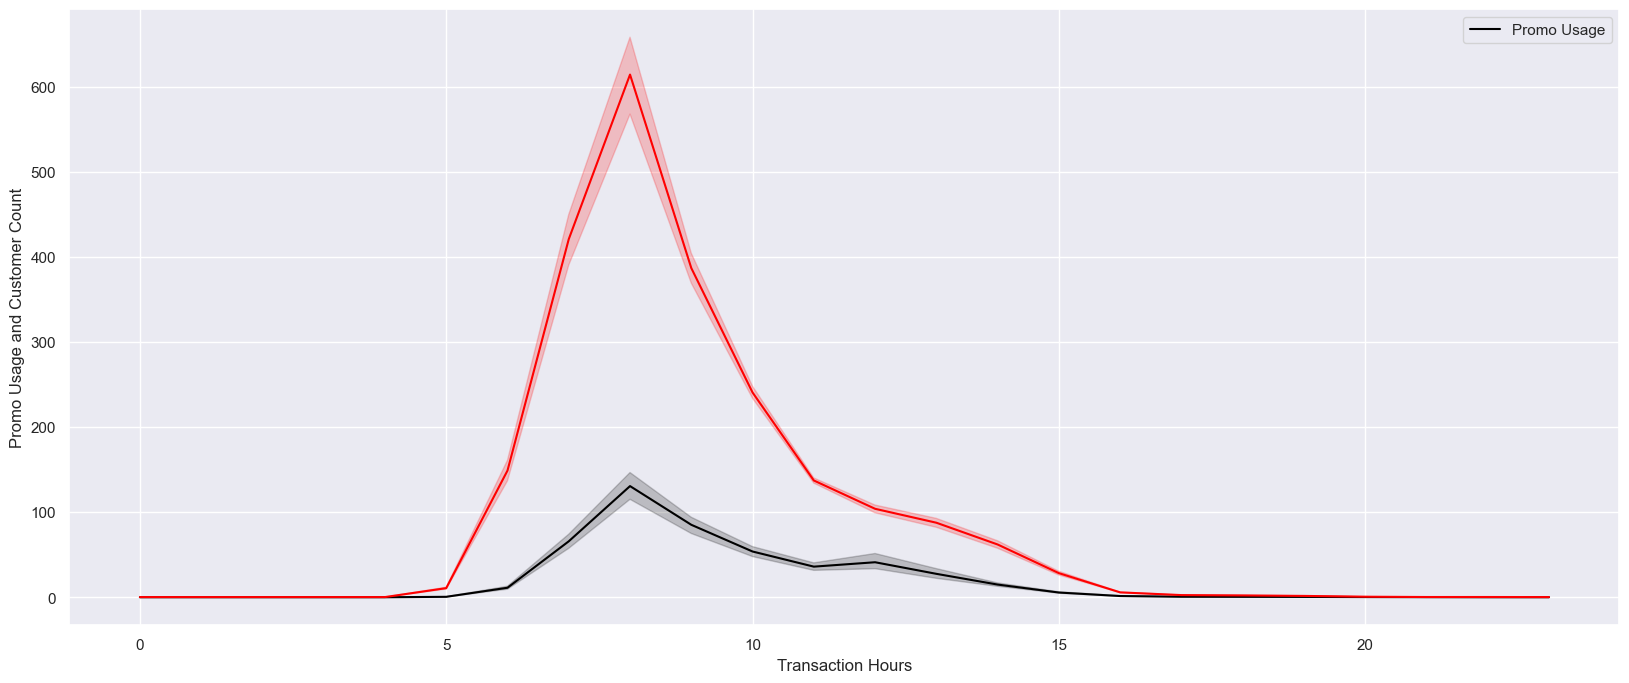

In [257]:
sns.set_theme(style = 'whitegrid', palette = 'dark')
sns.set(font_scale = 1)
rcParams['figure.figsize'] = 20, 8

sns.lineplot(data = data, x = data['trans_hour'], y = data['promo_count'], color = 'black')
sns.lineplot(data = data, x = data['trans_hour'], y = data['customers']/10, color = 'red') # I divided the customer count by 100 to aid in visualizing their correlations
plt.xlabel('Transaction Hours')
plt.ylabel('Promo Usage and Customer Count')
plt.grid(visible = True)
plt.legend(['Promo Usage'])

plt.show()

In [171]:
data.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


Promo Usage Per Unique Device Platforms

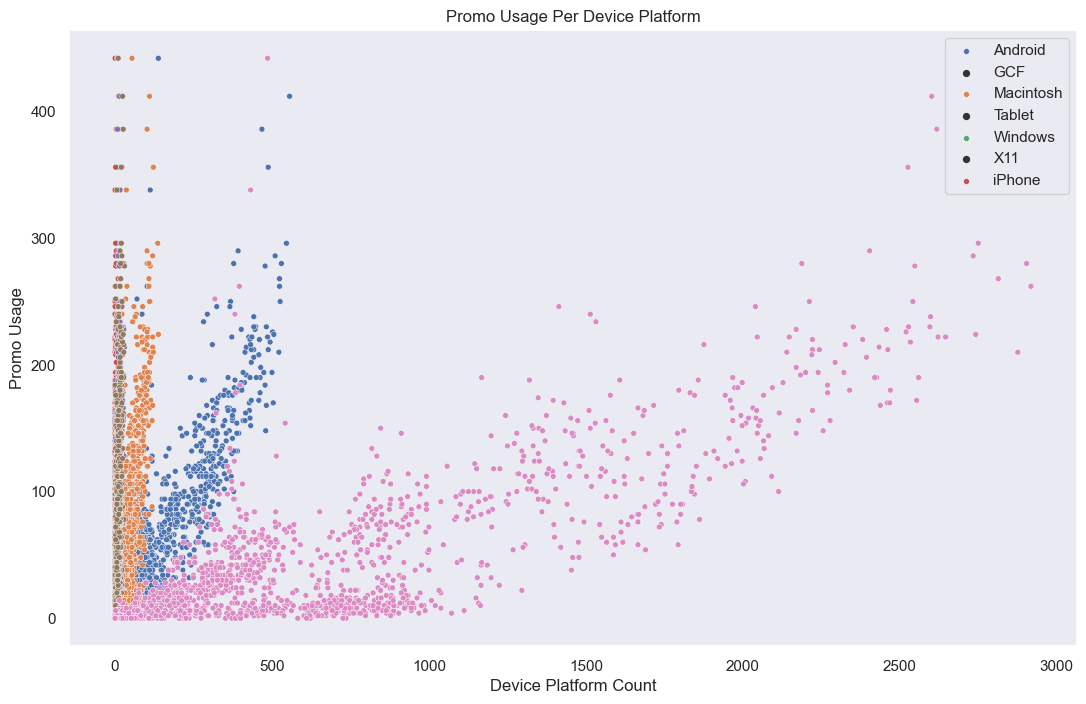

In [240]:
sns.set_theme(style = 'whitegrid', palette = 'pastel')
sns.set(font_scale = 1)
rcParams['figure.figsize'] = 13, 8

sns.scatterplot(data = data, x = data['Android'], y = data['promo_count'], size=.5)
sns.scatterplot(data = data, x = data['GCF'], y = data['promo_count'], size=.5)
sns.scatterplot(data = data, x = data['Macintosh'], y = data['promo_count'], size=.5)
sns.scatterplot(data = data, x = data['Tablet'], y = data['promo_count'], size=.5)
sns.scatterplot(data = data, x = data['Windows'], y = data['promo_count'], size=.5)
sns.scatterplot(data = data, x = data['X11'], y = data['promo_count'], size=.5)
sns.scatterplot(data = data, x = data['iPhone'], y = data['promo_count'], size=.5)

plt.title('Promo Usage Per Device Platform')
plt.xlabel('Device Platform Count')
plt.ylabel('Promo Usage')
plt.grid(visible=False)
plt.legend(['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone'])

plt.show()

Promo Usage and Amount: Blacklisted vs. Not Blacklisted

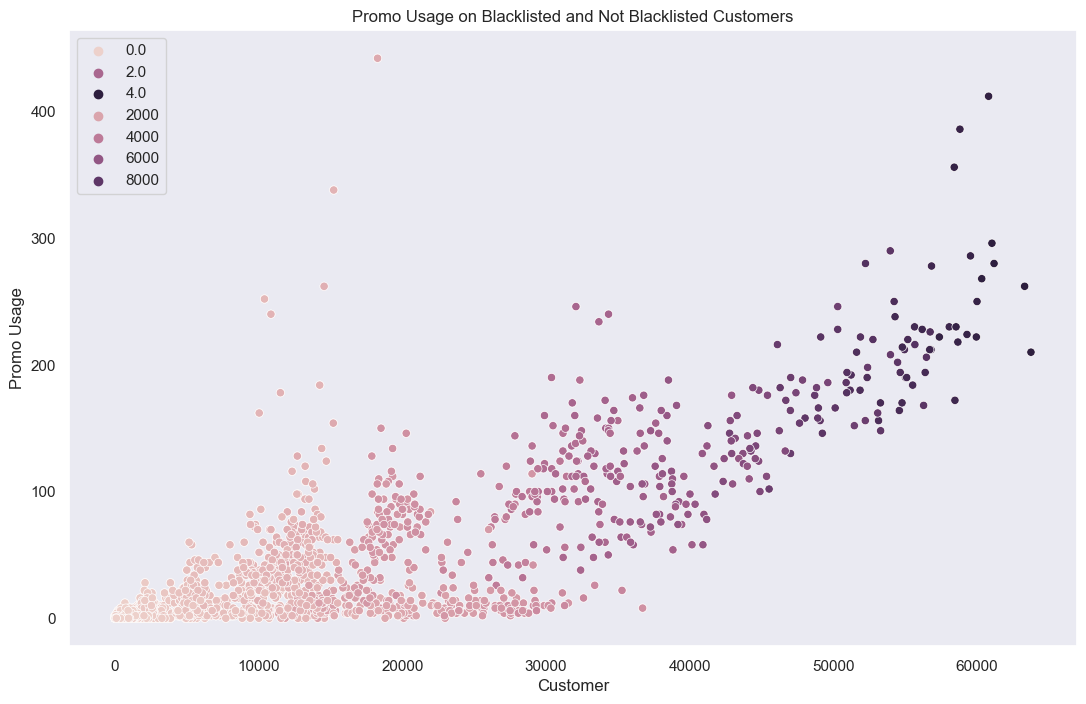

In [248]:
sns.set_theme(style = 'whitegrid', palette = 'dark')
sns.set(font_scale = 1)
rcParams['figure.figsize'] = 13, 8

sns.scatterplot(data = data, x = data['amount'], y = data['promo_count'], hue = data['Blacklisted'])
sns.scatterplot(data = data, x = data['amount'], y = data['promo_count'], hue = data['Not Blacklisted'])

plt.title('Promo Usage on Blacklisted and Not Blacklisted Customers')
plt.xlabel('Customer')
plt.ylabel('Promo Usage')
plt.grid(visible=False)
plt.legend()

plt.show()


End